# Master 2 High Performance Computing and Simulation

## Members : lougani faouzi ,hery Andrianantenaina

## Report of module Data & Apprentissage TD1

## Exercice 01


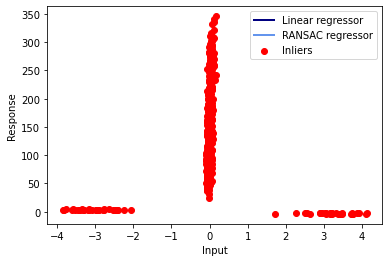

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error

n_outliers = 30
n_samples = 100


def model(x,theta):
    return x.dot(theta)



def MY_RANSAC(x, y,taille, n, k, t, d):
    iterator = 0
    meilleur_erreur = 1000
    
    meilleur_modele = None
    meilleur_ensemble = None
    meilleur_ensemble_points = None
    

    while iterator < k:
        # on definis l'enssemble de points aléatoires
        points_aleatoires = random.sample(range(0,taille-1), 20)
        x_alea = np.zeros(shape=(n,1))
        y_alea = np.zeros(shape=(n,1))
    
        j = 0
        for i in points_aleatoires:
            x_alea[j] = x[i]
            y_alea[j] = y[i]
            j = j+ 1

        
        #Parametres du modèle

        X = np.hstack((x_alea,np.ones(x_alea.shape)))
        reg = LinearRegression().fit(X,y_alea)
        modele_possible = reg.coef_
        ensemble_points = points_aleatoires

    

        #Le reste des points de notre dataset
        x_reste  =  np.zeros(shape=(taille-n,1))
        y_reste =  np.zeros(shape=(taille-n,1))
        point_rest = np.zeros(shape=(taille-n,1))
        k = 0
        for i in range(taille): 
            if i not in points_aleatoires:
                x_reste[k] = x[i]
                y_reste[k] = y[i]
                point_rest[k] = i
                k = k + 1


        X_reste = np.hstack((x_reste,np.ones(x_reste.shape)))
        y_pred = reg.predict(X_reste)

        
        # ajout des points qui repondent au critère à l'enssemble de points 
        for  point in range(taille-n):

            if (math.sqrt((y_reste[point] - y_pred[point] )**2)) < t:
                ensemble_points.append(point)




        # la cardinalité de l'ensemble de poits est superieure à d 
        if len(ensemble_points) > d:
            x_points   =  np.zeros(shape=(len(ensemble_points) ,1))
            y_points =  np.zeros(shape=(len(ensemble_points) ,1))

            k = 0
            for i in ensemble_points :
                x_points[k] = x[i] 
                y_points[k] = y[i]
                k  = k + 1 


            X_points= np.hstack((x_points,np.ones(x_points.shape)))

            x_test = X_points[:len(X_points)-int(len(X_points)*0.7)]
            y_test = y_points[:len(X_points)-int(len(y_points)*0.7)]

            x_train =X_points[len(X_points)-int(len(X_points)*0.7):]
            y_train = y_points[len(X_points)-int(len(y_points)*0.7):]
        

    
            reg = LinearRegression().fit(x_train,y_train)

            y_predict = reg.predict(x_test)

            modele_possible = reg.coef_
            erreur = mean_squared_error(y_test, y_predict)

            #print(erreur)
            if erreur < meilleur_erreur:
                meilleur_modele = modele_possible
                meilleur_ensemble_points = ensemble_points
                meilleur_erreur = erreur

    
        iterator = iterator + 1


    return meilleur_modele, meilleur_ensemble_points, meilleur_erreur

x, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10)

# utilisation des données de Lab2
diabetes = datasets.load_diabetes()

x = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Add outlier data
np.random.seed(0)

x = np.append(x,3 + 0.5 * np.random.normal(size=(n_outliers, 1)))

y = np.append(y,-3 + 0.5 * np.random.normal(size=n_outliers ))

x = np.append(x,-3 + 0.5 * np.random.normal(size=(n_outliers, 1)))

y = np.append(y,3 + 0.5 * np.random.normal(size=n_outliers ))





x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)


taille =2*n_outliers + n_samples
inlier_mask = n_samples - n_outliers
	
n = 20
k = 10
t = 2
d = 20


meilleur_modele, meilleur_ensemble_points, meilleur_erreur = MY_RANSAC(x, y,taille, n, k, t, d)


#Linear regression, pour la comparaison avec RANSAC
lr = LinearRegression()
lr.fit(x, y)

#utilisation de scikit learn ransac regression
ransac = RANSACRegressor()
ransac.fit(x, y)


#Tracer les lignes 
line_X = np.arange(x[:inlier_mask].min(), x[:inlier_mask].max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)


lw = 2
plt.scatter(x, y, color='red', marker='o', label='Inliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
plt.legend(loc='upper right')
plt.xlabel("Input")
plt.ylabel("Response")

plt.show()


## Exercice 02

a) How we can design a solution to the problem of robust estimate of the center of a data point cloud that adopts 
the RANSAC principle.

1. Define NB as the number of times we will redo steps 2,3,4,5,6
2. Calculate the error R which will be half of the greatest distance between two points of the set.
3. Define N_C the number of points that we accept to consider a point as a center
4. Choose a random point in the data set.
5. Calculate the distance between this random point and the others. If the distance < N_C, add it to the cloud of the chosen center
6. If the number of points associated with the chosen center > N_C, this point will be the center ,then the new center will replace the old center defined in a previous iteration if its cloud is greater.
7. Repeat NB steps, then return to the last iteration where the center is found.



b) Extend this approach to the clustering of the data in a given number of 𝑘 clusters by considering an existing clustering method, such as 𝑘-means, as the internal model learner).

c) Could you imagine other applications?

* Recognition of objects is one of the RANSAC applications.


d) Abstract pseudocode that expresses the generalization of RANSAC in arbitrary learning problems

* Select N (the number of samples)randomly. 
* we estimates a model hypothesis for each sample.
* find the number of inliers for each hypothesis.
* we chose the hypothesis with largest number of inliners as a model and use them to affect model parameters.
* The inlier is chosen as a point that his residual R is in some threshold T of the hypothesis.
* We can deduce the correct hypothesis because our N samples contain at least one sample  which consists of only true correspondences.





## Exercice 03

Cross validation :
it is a technique used to see how well will the model fit to unknown data, based on deviding the set of data that we have into multiple sets, that we will use either to train the model or to test it

Using this technique for time series involve taking into account new data generated as time goes. This can make a problem because observations from the training set must occur before their corresponding test set =>temporal dependency between observations, and that every test set contains unique observations =>good choice of test set

Here we start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted,As the following example explains:

* We do training 1 then the test 2
* We do training 1 and 2 then the test 3
* We do training 1,2,3 then test 4


Pseudocode that would apply (i) and (ii) will be like:



## Exercice 04

a) multi-class SVM with the <1 class-vs-all classes> architecture, where 𝑘 classifiers as many as the classes, and each one of them will be trained to distinguish the objects of one class against any other class.
c)Make a simple demonstration on Iris dataset

Text(0.5, 1.0, ' 1 class-vs-all classes SVM ')

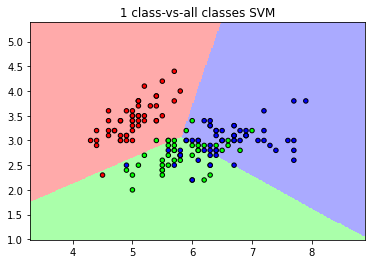

In [1]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

 

#load iris data by Taking the first two features using 2D dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, :2]
Y = iris_data.target


# split traning and test sets, 
X_train, X_test, y_train, y_test = \
train_test_split(X, Y, stratify=Y, test_size=0.7)
    
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#begin to learn predict each class against the other
# Create an SVM instance and fit out data. here to plot the support vectors we will not scale our data .
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#predicting the label k for which the corresponding classifier reports the highest confidence score 
y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# step size in the mesh
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold,edgecolor='k', s=20)
plt.title(" 1 class-vs-all classes SVM ")


b) multi-class SVM with <*1 class-vs-1 class*> architecture, where we will need $\frac{1}{2}(k-1)^2$ classifiers, each one of them deciding among two classes only.c)Make a simple demonstration on Iris dataset  

Text(0.5, 1.0, ' 1 class-vs-1 class SVM ')

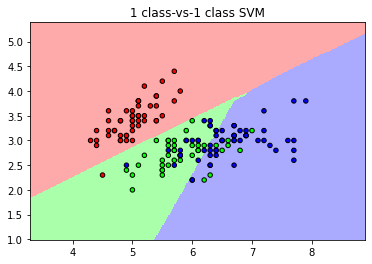

In [1]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#load iris data by Taking the first two features using 2D dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, :2]
y = iris_data.target

#This is implemented as ``argmax(decision_function(X), axis=1)`` which will return the label of the class with most votes by estimators predicting the outcome of a decision for each possible class pair.


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7)

#begin to learn predict each class against the other
# Create an SVM instance and fit out data. here to plot the support vectors we will not scale our data .
clf = OneVsOneClassifier(LinearSVC(max_iter=1000000, random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# step size in the mesh
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.title(" 1 class-vs-1 class SVM ")


